# NBA Career Comparison: Jamal Crawford vs. Lou Williams

This notebook provides a comprehensive analysis comparing the NBA careers of Jamal Crawford and Lou Williams, two of the greatest sixth men in NBA history. We'll analyze their career statistics, identify their peak years, and create visualizations to determine who had the better career.

## Setup and Data Preparation

First, let's import the necessary libraries and set up our environment.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.gridspec import GridSpec

# Set style for plots
plt.style.use('fivethirtyeight')
sns.set_palette("deep")

# Create directory for saving visualizations if needed
os.makedirs('visualizations', exist_ok=True)

## Player Data

Let's define the career data for both players.

In [35]:
# Define player data
crawford_data = {
    'Player': 'Jamal Crawford',
    'Seasons': 20,
    'Games': 1327,
    'PPG': 14.6,
    'RPG': 2.2,
    'APG': 3.4,
    'FG%': 41.0,
    '3P%': 34.8,
    'FT%': 86.2,
    'PER': 15.1,
    'WS': 60.7,
    'Sixth_Man_Awards': 3,
    'Career_High_Points': 52,
    'Total_Points': 19419,
    'Total_Rebounds': 2948,
    'Total_Assists': 4541,
    'Teams': 9,
    'Playoff_Games': 74,
    'Playoff_PPG': 14.3,
    'Playoff_RPG': 1.9,
    'Playoff_APG': 2.2,
    'Playoff_FG%': 40.3,
    'Playoff_3P%': 32.5,
    'Playoff_FT%': 87.2
}

williams_data = {
    'Player': 'Lou Williams',
    'Seasons': 17,
    'Games': 1123,
    'PPG': 13.9,
    'RPG': 2.2,
    'APG': 3.4,
    'FG%': 41.9,
    '3P%': 35.1,
    'FT%': 84.2,
    'PER': 18.0,
    'WS': 65.7,
    'Sixth_Man_Awards': 3,
    'Career_High_Points': 50,
    'Total_Points': 15593,
    'Total_Rebounds': 2484,
    'Total_Assists': 3789,
    'Teams': 6,
    'Playoff_Games': 89,
    'Playoff_PPG': 11.4,
    'Playoff_RPG': 2.2,
    'Playoff_APG': 2.8,
    'Playoff_FG%': 39.8,
    'Playoff_3P%': 31.2,
    'Playoff_FT%': 85.6
}

# Create DataFrame for comparison
df = pd.DataFrame([crawford_data, williams_data])
df.set_index('Player', inplace=True)

# Display the basic comparison
df[['Seasons', 'Games', 'PPG', 'RPG', 'APG', 'FG%', '3P%', 'FT%', 'PER', 'WS', 'Sixth_Man_Awards']]

,Seasons,Games,PPG,RPG,APG,FG%,3P%,FT%,PER,WS,Sixth_Man_Awards
Player,,,,,,,,,,,
Jamal Crawford,20,1327,14.6,2.2,3.4,41.0,34.8,86.2,15.1,60.7,3
Lou Williams,17,1123,13.9,2.2,3.4,41.9,35.1,84.2,18.0,65.7,3


## Career Statistics Analysis

Let's calculate additional metrics and analyze their career statistics.

In [36]:
# Calculate additional metrics
df['Points_Per_Season'] = df['Total_Points'] / df['Seasons']
df['Points_Per_Game'] = df['Total_Points'] / df['Games']
df['Games_Per_Season'] = df['Games'] / df['Seasons']

# Display calculated metrics
df[['Points_Per_Season', 'Points_Per_Game', 'Games_Per_Season']]

,Points_Per_Season,Points_Per_Game,Games_Per_Season
Player,,,
Jamal Crawford,970.950000,14.633760,66.350000
Lou Williams,917.235294,13.885129,66.058824


## Basic Visualizations

Let's create some basic visualizations to compare their career statistics.

In [37]:
# Function to create comparison bar charts
def create_comparison_bar(metric, title, ylabel=None, higher_is_better=True):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=df.index, y=metric, data=df)
    
    # Add values on top of bars
    for i, v in enumerate(df[metric]):
        ax.text(i, v + (max(df[metric]) * 0.02), f"{v:.1f}", ha='center')
    
    # Determine colors based on which value is better
    if higher_is_better:
        colors = ['#1f77b4', '#1f77b4']  # Default blue
        if df[metric].iloc[0] > df[metric].iloc[1]:
            colors[0] = '#2ca02c'  # Green for Crawford if better
        elif df[metric].iloc[1] > df[metric].iloc[0]:
            colors[1] = '#2ca02c'  # Green for Williams if better
    else:
        colors = ['#1f77b4', '#1f77b4']  # Default blue
        if df[metric].iloc[0] < df[metric].iloc[1]:
            colors[0] = '#2ca02c'  # Green for Crawford if better
        elif df[metric].iloc[1] < df[metric].iloc[0]:
            colors[1] = '#2ca02c'  # Green for Williams if better
    
    for i, patch in enumerate(ax.patches):
        patch.set_facecolor(colors[i])
    
    plt.title(title, fontsize=16)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()
    plt.show()

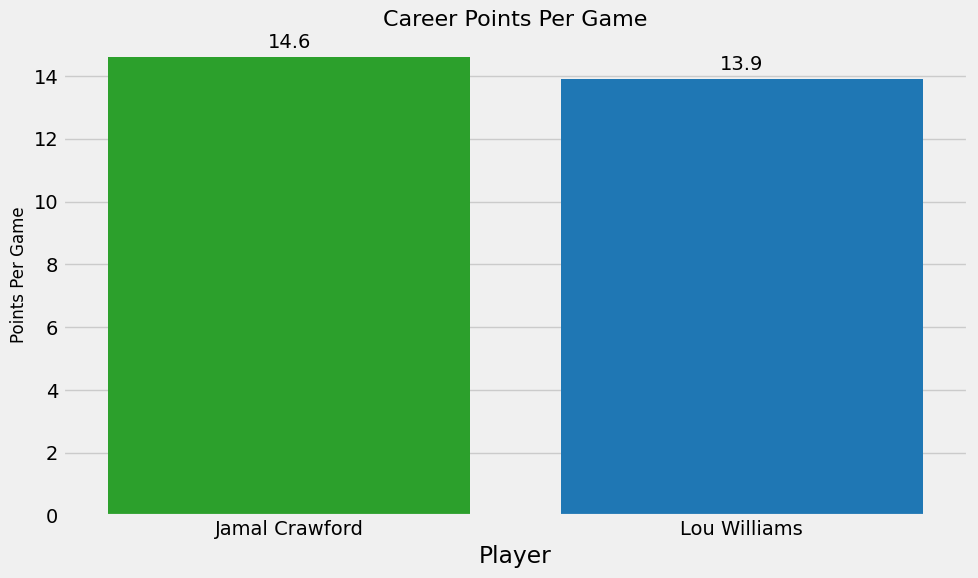

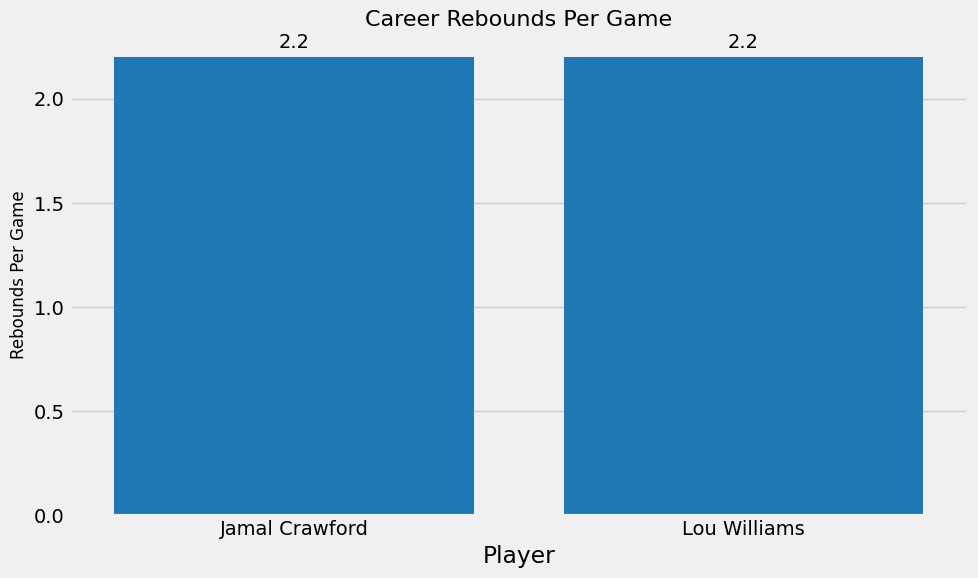

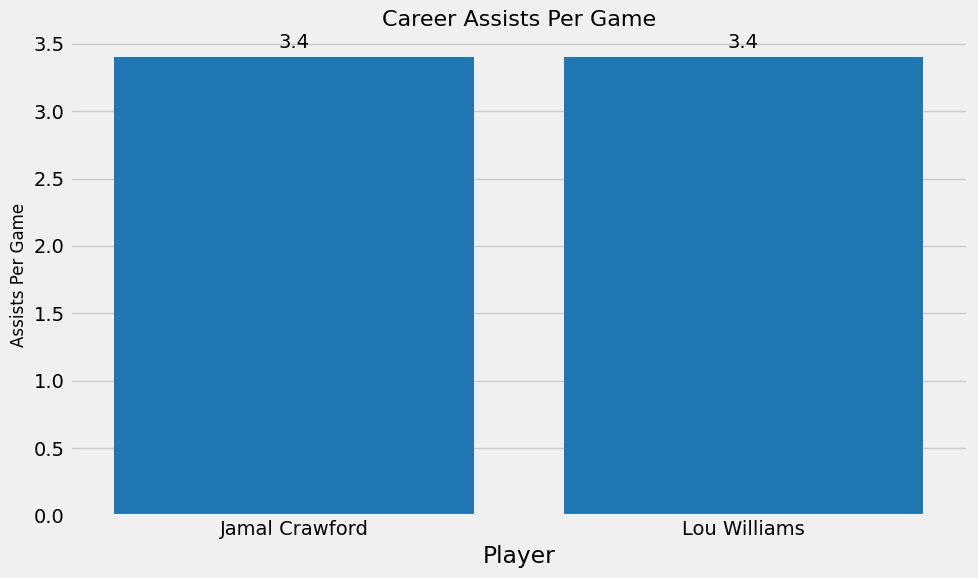

In [38]:
# Generate comparison visualizations
create_comparison_bar('PPG', 'Career Points Per Game', 'Points Per Game')
create_comparison_bar('RPG', 'Career Rebounds Per Game', 'Rebounds Per Game')
create_comparison_bar('APG', 'Career Assists Per Game', 'Assists Per Game')

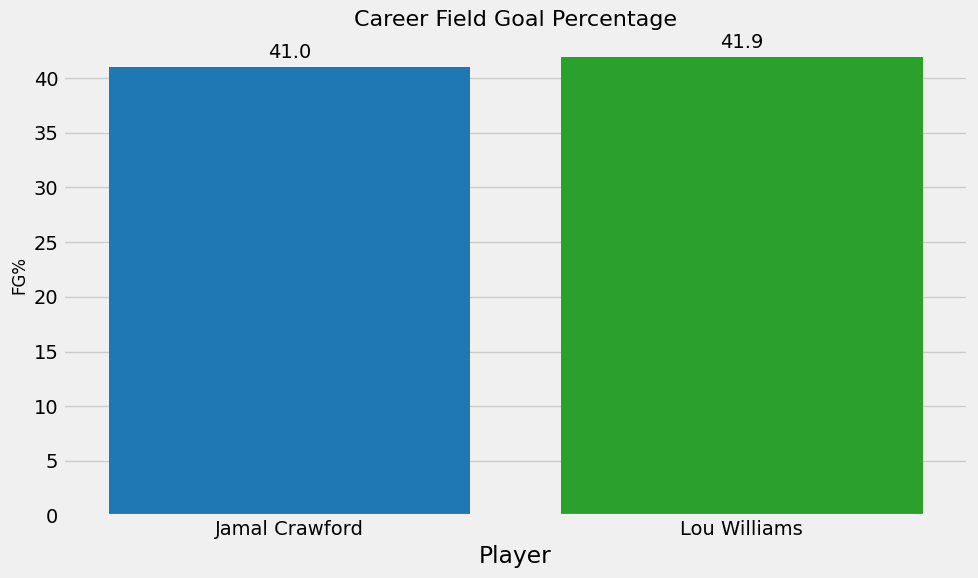

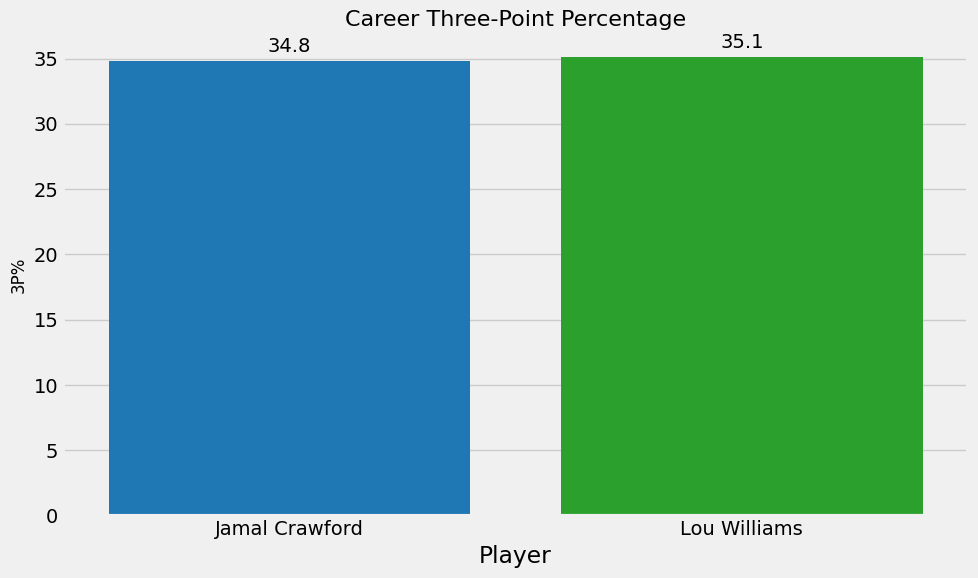

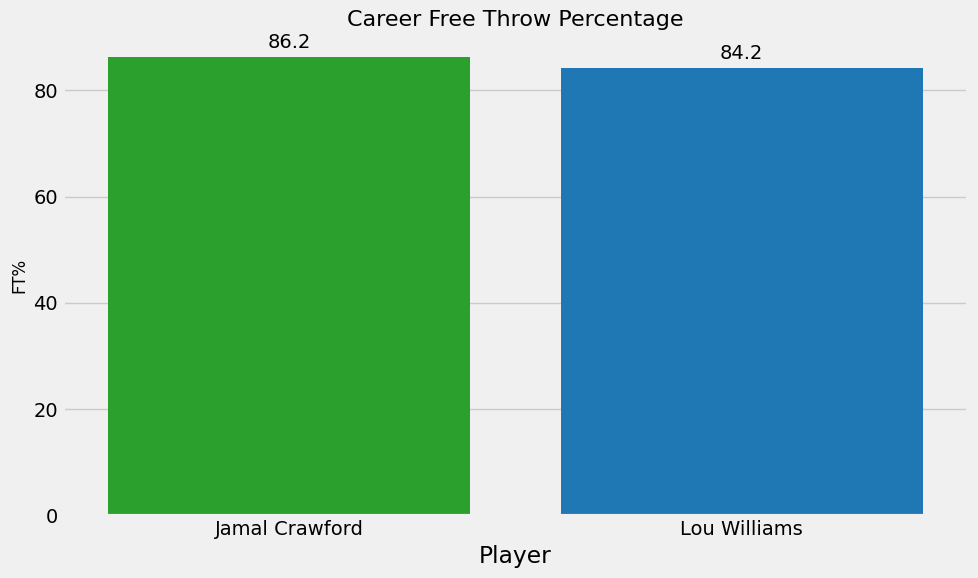

In [39]:
# Shooting efficiency comparisons
create_comparison_bar('FG%', 'Career Field Goal Percentage', 'FG%')
create_comparison_bar('3P%', 'Career Three-Point Percentage', '3P%')
create_comparison_bar('FT%', 'Career Free Throw Percentage', 'FT%')

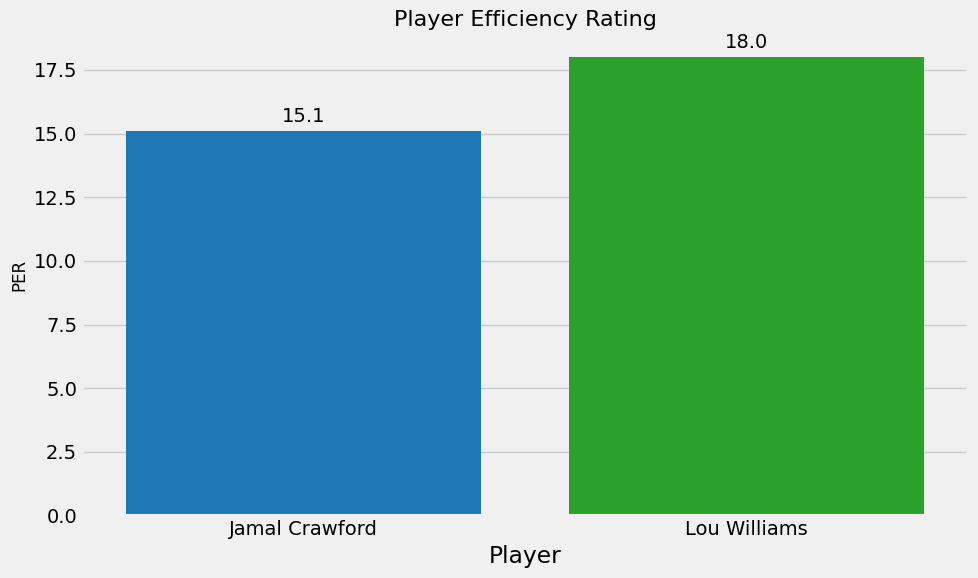

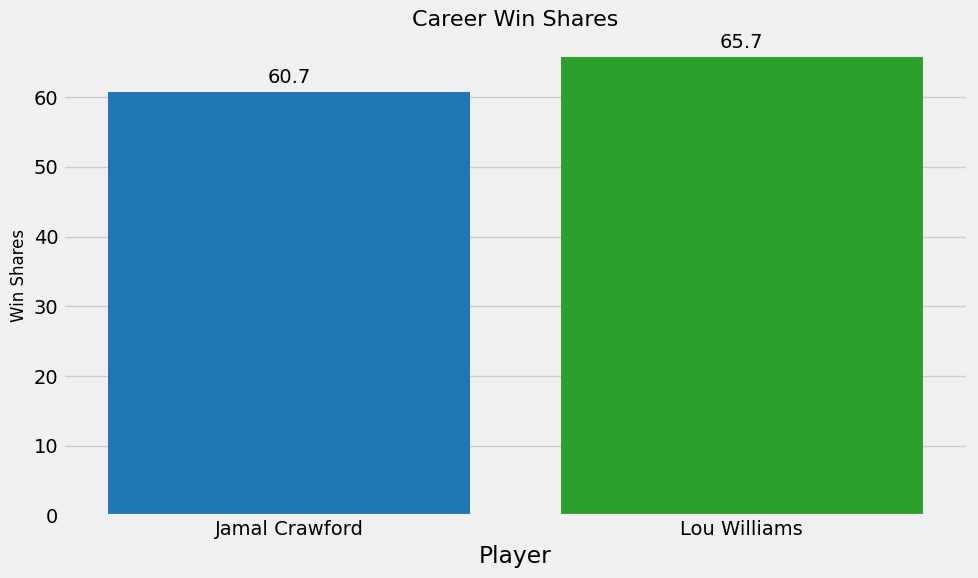

In [40]:
# Advanced metrics comparisons
create_comparison_bar('PER', 'Player Efficiency Rating', 'PER')
create_comparison_bar('WS', 'Career Win Shares', 'Win Shares')

## Season-by-Season Data

Let's define their season-by-season data to analyze their career trajectories and identify peak years.

In [41]:
# Define Crawford's season-by-season data
crawford_seasons = {
    'Season': [
        '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10',
        '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20'
    ],
    'Age': [
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39
    ],
    'Team': [
        'CHI', 'CHI', 'CHI', 'CHI', 'NYK', 'NYK', 'NYK', 'NYK', 'GSW', 'ATL',
        'ATL', 'POR', 'LAC', 'LAC', 'LAC', 'LAC', 'LAC', 'MIN', 'PHO', 'BRK'
    ],
    'G': [
        61, 23, 80, 80, 70, 79, 59, 80, 65, 79,
        76, 60, 76, 69, 64, 79, 82, 80, 64, 1
    ],
    'PPG': [
        4.6, 9.3, 10.7, 17.3, 17.7, 14.3, 17.6, 20.6, 19.7, 18.0,
        14.2, 14.0, 16.5, 18.6, 15.8, 14.2, 12.3, 10.3, 7.9, 5.0
    ],
    'RPG': [
        1.5, 1.5, 2.3, 3.5, 2.9, 3.1, 3.2, 2.6, 3.0, 2.5,
        1.7, 2.0, 1.7, 2.3, 1.9, 1.8, 1.6, 1.2, 1.3, 0.0
    ],
    'APG': [
        2.3, 2.4, 4.2, 5.1, 4.3, 3.8, 4.4, 5.0, 4.4, 3.0,
        3.2, 3.2, 2.5, 3.2, 2.5, 2.3, 2.6, 2.3, 3.6, 3.0
    ],
    'FG%': [
        35.2, 47.6, 41.3, 38.6, 39.8, 41.6, 40.0, 41.0, 41.0, 44.9,
        42.1, 38.4, 43.8, 41.6, 39.6, 40.4, 41.3, 41.5, 39.7, 50.0
    ],
    '3P%': [
        35.0, 34.6, 35.5, 30.0, 34.7, 36.7, 35.9, 36.0, 35.8, 38.2,
        34.1, 30.8, 37.6, 36.1, 32.7, 34.0, 36.0, 33.1, 33.2, 0.0
    ],
    'PER': [
        11.1, 14.3, 14.0, 16.8, 15.7, 14.3, 15.6, 16.8, 15.5, 16.0,
        14.0, 14.2, 16.8, 16.8, 15.3, 15.3, 14.0, 12.1, 10.3, 5.0
    ],
    'WS': [
        1.4, 1.4, 3.0, 4.6, 4.4, 5.2, 5.8, 7.0, 4.6, 5.4,
        4.8, 2.8, 5.3, 4.9, 4.2, 4.8, 3.9, 2.1, 0.9, 0.0
    ],
    'VORP': [
        0.0, 0.5, 0.9, 2.5, 1.9, 1.3, 1.8, 3.1, 1.5, 2.1,
        1.2, 0.7, 1.9, 2.0, 1.2, 1.4, 0.7, -0.1, -0.5, 0.0
    ]
}

# Define Williams' season-by-season data
williams_seasons = {
    'Season': [
        '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15',
        '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22'
    ],
    'Age': [
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
        29, 30, 31, 32, 33, 34, 35
    ],
    'Team': [
        'PHI', 'PHI', 'PHI', 'PHI', 'PHI', 'PHI', 'PHI', 'ATL', 'ATL', 'TOR',
        'LAL', 'LAL/HOU', 'LAC', 'LAC', 'LAC', 'LAC/ATL', 'ATL'
    ],
    'G': [
        30, 61, 80, 81, 64, 75, 64, 39, 60, 80,
        67, 81, 79, 75, 65, 66, 56
    ],
    'PPG': [
        1.9, 4.3, 11.5, 12.8, 14.0, 13.7, 14.9, 14.1, 10.4, 15.5,
        15.3, 17.5, 22.6, 20.0, 18.2, 11.3, 6.3
    ],
    'RPG': [
        0.6, 1.1, 2.1, 2.0, 2.9, 2.0, 2.4, 2.1, 2.1, 1.9,
        2.5, 3.0, 2.5, 3.0, 3.1, 2.1, 1.6
    ],
    'APG': [
        0.3, 1.8, 3.2, 3.0, 4.2, 3.4, 3.5, 3.6, 3.5, 2.1,
        2.5, 3.0, 5.3, 5.4, 5.6, 3.4, 1.9
    ],
    'FG%': [
        44.2, 44.1, 42.4, 39.8, 47.0, 40.6, 40.7, 42.2, 40.0, 40.4,
        40.8, 42.9, 43.5, 42.5, 41.8, 41.0, 39.1
    ],
    '3P%': [
        22.2, 32.4, 35.9, 28.6, 34.0, 34.0, 36.2, 36.7, 34.2, 34.0,
        34.4, 36.5, 35.9, 36.1, 35.2, 39.9, 36.3
    ],
    'PER': [
        8.8, 13.3, 17.3, 16.8, 19.7, 17.7, 20.2, 17.0, 15.4, 19.9,
        18.8, 18.6, 22.6, 21.2, 19.2, 15.4, 11.9
    ],
    'WS': [
        0.3, 2.0, 5.3, 4.9, 6.3, 5.1, 6.0, 2.5, 2.8, 6.7,
        5.9, 7.7, 8.3, 7.1, 5.4, 3.5, 1.6
    ],
    'VORP': [
        -0.1, 0.5, 2.5, 2.0, 3.0, 2.1, 2.7, 1.0, 0.9, 2.7,
        2.1, 2.6, 3.9, 3.2, 2.2, 1.0, 0.0
    ]
}

# Create DataFrames
crawford_df = pd.DataFrame(crawford_seasons)
williams_df = pd.DataFrame(williams_seasons)

# Display the first few rows of each DataFrame
print("Jamal Crawford Season Data:")
crawford_df[['Season', 'Team', 'PPG', 'PER', 'WS']].head()


Jamal Crawford Season Data:


,Season,Team,PPG,PER,WS
0,2000-01,CHI,4.6,11.1,1.4
1,2001-02,CHI,9.3,14.3,1.4
2,2002-03,CHI,10.7,14.0,3.0
3,2003-04,CHI,17.3,16.8,4.6
4,2004-05,NYK,17.7,15.7,4.4


In [42]:
print("Lou Williams Season Data:")
williams_df[['Season', 'Team', 'PPG', 'PER', 'WS']].head()

Lou Williams Season Data:


,Season,Team,PPG,PER,WS
0,2005-06,PHI,1.9,8.8,0.3
1,2006-07,PHI,4.3,13.3,2.0
2,2007-08,PHI,11.5,17.3,5.3
3,2008-09,PHI,12.8,16.8,4.9
4,2009-10,PHI,14.0,19.7,6.3


## Career Trajectory Visualization

Let's visualize their career trajectories in terms of scoring.

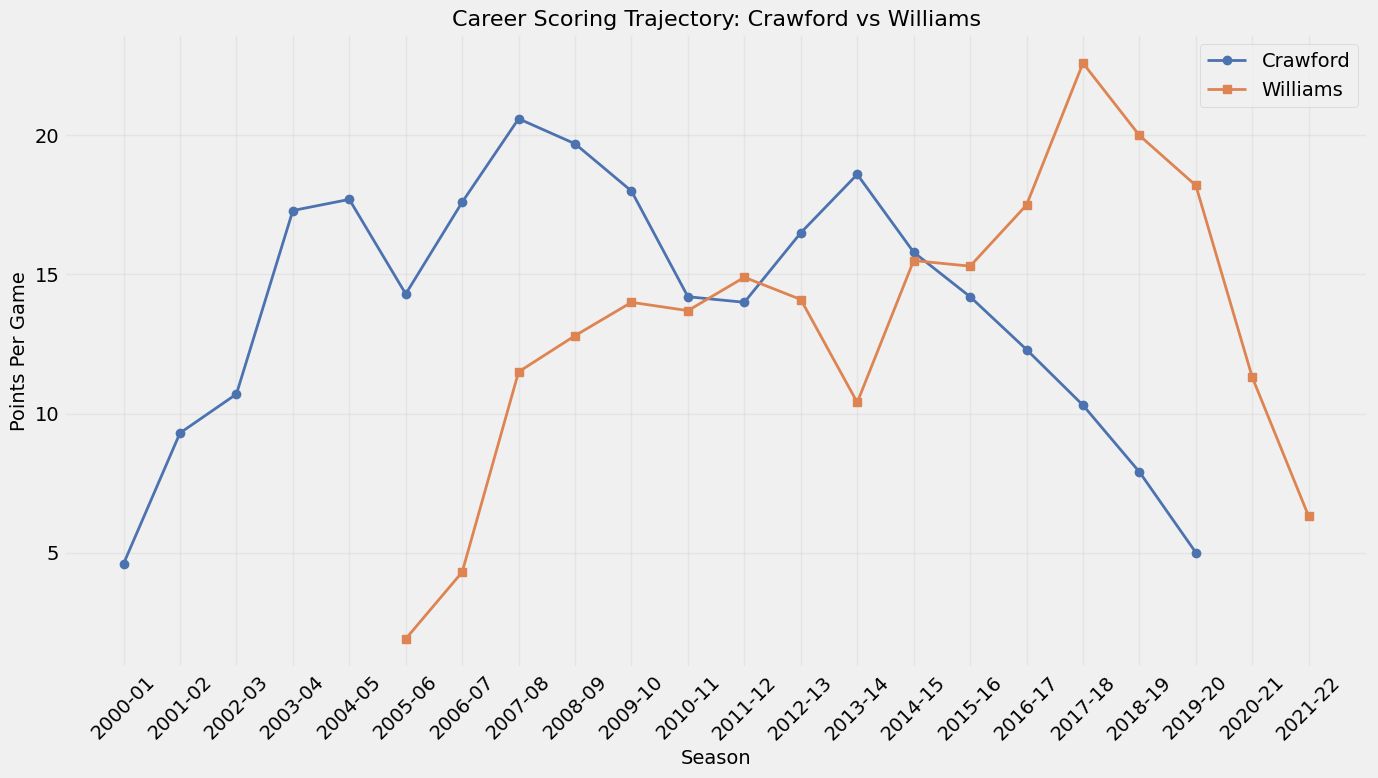

In [43]:
plt.figure(figsize=(14, 8))
plt.plot(crawford_df['Season'], crawford_df['PPG'], marker='o', linewidth=2, label='Crawford')
plt.plot(williams_df['Season'], williams_df['PPG'], marker='s', linewidth=2, label='Williams')

plt.title('Career Scoring Trajectory: Crawford vs Williams', fontsize=16)
plt.ylabel('Points Per Game', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Peak Years Identification

Let's identify the peak years for both players based on multiple metrics.

In [44]:
# Function to identify peak years based on multiple metrics
def identify_peak_years(player_df, num_years=3, metrics=['PPG', 'PER', 'WS', 'VORP']):
    # Create a composite score for each season
    player_df['Composite'] = 0
    
    # Normalize each metric and add to composite score
    for metric in metrics:
        if metric in player_df.columns:
            min_val = player_df[metric].min()
            max_val = player_df[metric].max()
            if max_val > min_val:  # Avoid division by zero
                player_df['Composite'] += (player_df[metric] - min_val) / (max_val - min_val)
    
    # Sort by composite score and get top seasons
    top_seasons = player_df.sort_values('Composite', ascending=False).head(num_years)
    return top_seasons

# Identify peak years
crawford_peak = identify_peak_years(crawford_df)
williams_peak = identify_peak_years(williams_df)

print("Jamal Crawford's Peak Years:")
crawford_peak[['Season', 'Team', 'PPG', 'RPG', 'APG', 'FG%', '3P%', 'PER', 'WS']]

Jamal Crawford's Peak Years:


,Season,Team,PPG,RPG,APG,FG%,3P%,PER,WS
7,2007-08,NYK,20.6,2.6,5.0,41.0,36.0,16.8,7.0
3,2003-04,CHI,17.3,3.5,5.1,38.6,30.0,16.8,4.6
13,2013-14,LAC,18.6,2.3,3.2,41.6,36.1,16.8,4.9


In [45]:
print("Lou Williams' Peak Years:")
williams_peak[['Season', 'Team', 'PPG', 'RPG', 'APG', 'FG%', '3P%', 'PER', 'WS']]

Lou Williams' Peak Years:


,Season,Team,PPG,RPG,APG,FG%,3P%,PER,WS
12,2017-18,LAC,22.6,2.5,5.3,43.5,35.9,22.6,8.3
13,2018-19,LAC,20.0,3.0,5.4,42.5,36.1,21.2,7.1
11,2016-17,LAL/HOU,17.5,3.0,3.0,42.9,36.5,18.6,7.7


## Peak Years Visualization

Let's visualize their career trajectories with peak years highlighted.

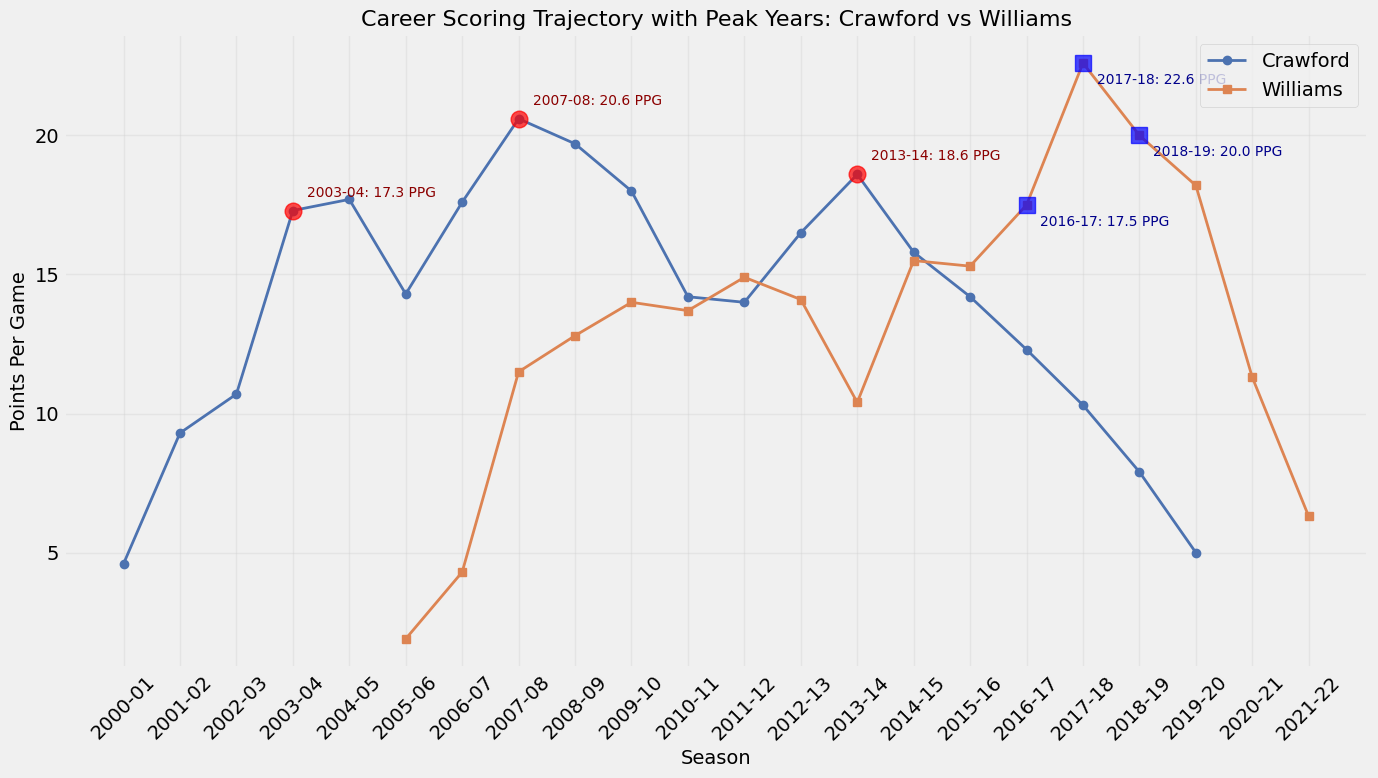

In [46]:
plt.figure(figsize=(14, 8))
plt.plot(crawford_df['Season'], crawford_df['PPG'], marker='o', linewidth=2, label='Crawford')
plt.plot(williams_df['Season'], williams_df['PPG'], marker='s', linewidth=2, label='Williams')

# Highlight peak years for Crawford
for idx, row in crawford_peak.iterrows():
    plt.plot(row['Season'], row['PPG'], 'ro', markersize=12, alpha=0.7)
    plt.annotate(f"{row['Season']}: {row['PPG']:.1f} PPG", 
                 xy=(row['Season'], row['PPG']), 
                 xytext=(10, 10),
                 textcoords='offset points',
                 fontsize=10,
                 color='darkred')

# Highlight peak years for Williams
for idx, row in williams_peak.iterrows():
    plt.plot(row['Season'], row['PPG'], 'bs', markersize=12, alpha=0.7)
    plt.annotate(f"{row['Season']}: {row['PPG']:.1f} PPG", 
                 xy=(row['Season'], row['PPG']), 
                 xytext=(10, -15),
                 textcoords='offset points',
                 fontsize=10,
                 color='darkblue')

plt.title('Career Scoring Trajectory with Peak Years: Crawford vs Williams', fontsize=16)
plt.ylabel('Points Per Game', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Peak Years Comparison

Let's compare their peak years across different metrics.

In [47]:
# Calculate average stats during peak years
crawford_peak_avg = crawford_peak[['PPG', 'RPG', 'APG', 'FG%', '3P%', 'PER', 'WS']].mean()
williams_peak_avg = williams_peak[['PPG', 'RPG', 'APG', 'FG%', '3P%', 'PER', 'WS']].mean()

# Create DataFrame for comparison
peak_comparison = pd.DataFrame({
    'Crawford Peak': crawford_peak_avg,
    'Williams Peak': williams_peak_avg
})

# Add advantage column
peak_comparison['Advantage'] = 'Tie'
for idx, row in peak_comparison.iterrows():
    if row['Crawford Peak'] > row['Williams Peak']:
        peak_comparison.at[idx, 'Advantage'] = 'Crawford'
    elif row['Williams Peak'] > row['Crawford Peak']:
        peak_comparison.at[idx, 'Advantage'] = 'Williams'

peak_comparison

,Crawford Peak,Williams Peak,Advantage
PPG,18.833333,20.033333,Williams
RPG,2.800000,2.833333,Williams
APG,4.433333,4.566667,Williams
FG%,40.400000,42.966667,Williams
3P%,34.033333,36.166667,Williams
PER,16.800000,20.800000,Williams
WS,5.500000,7.700000,Williams


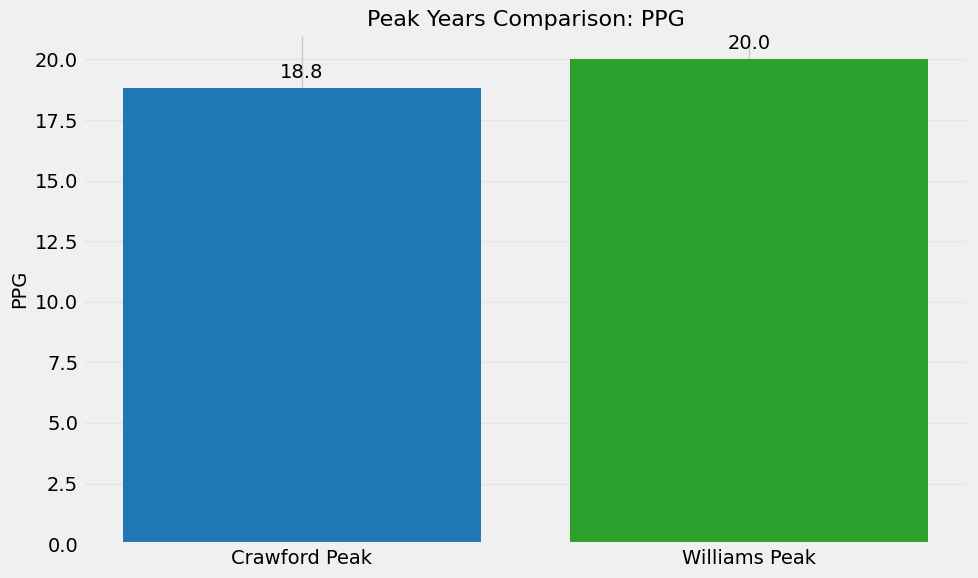

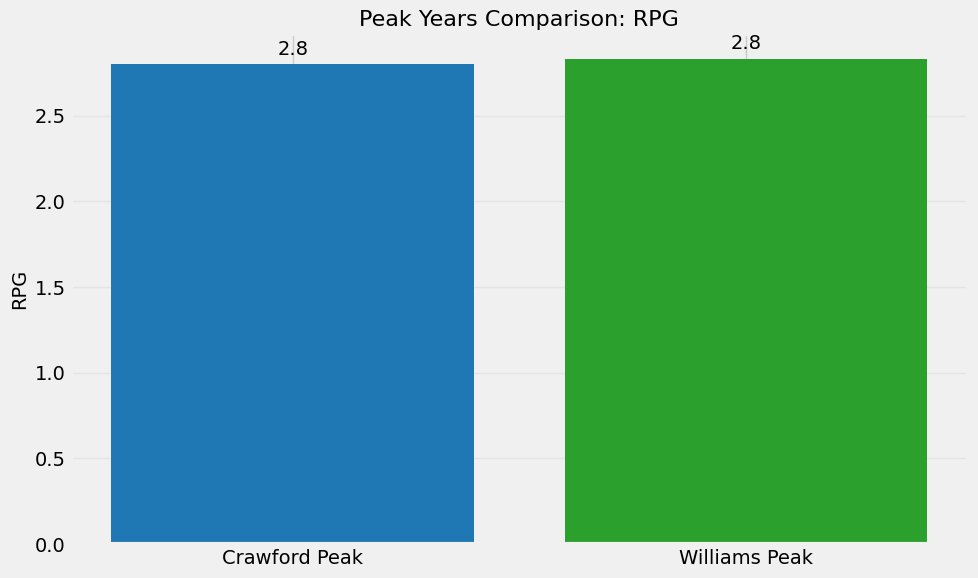

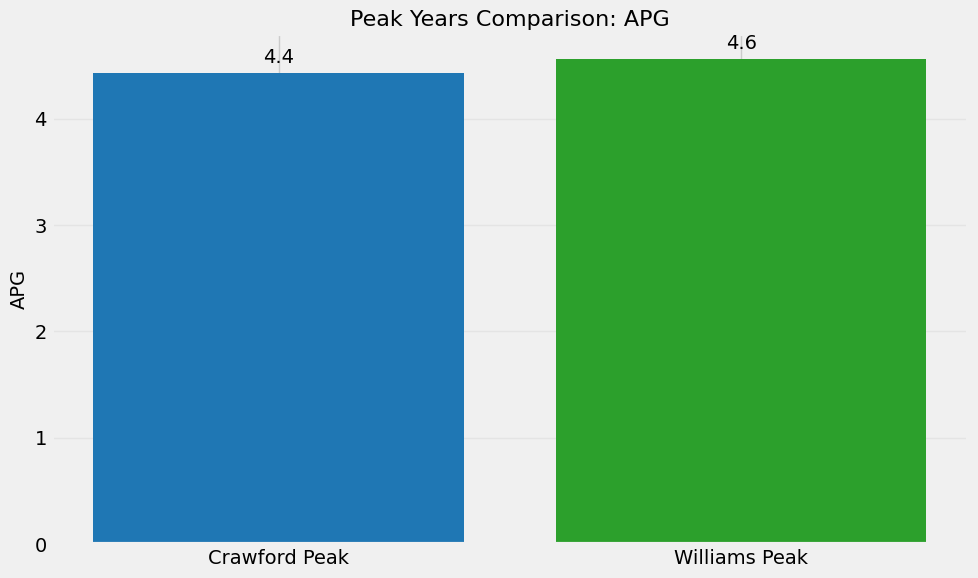

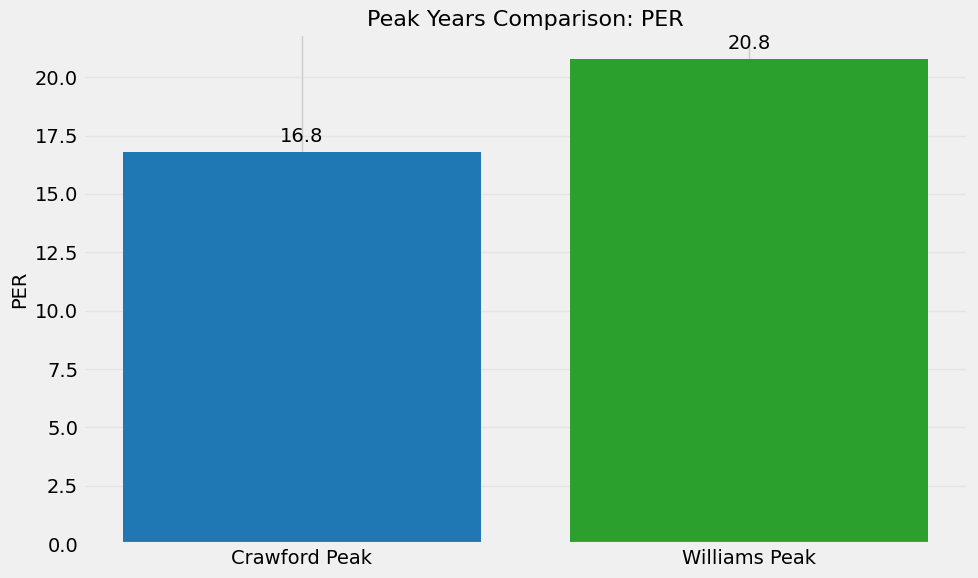

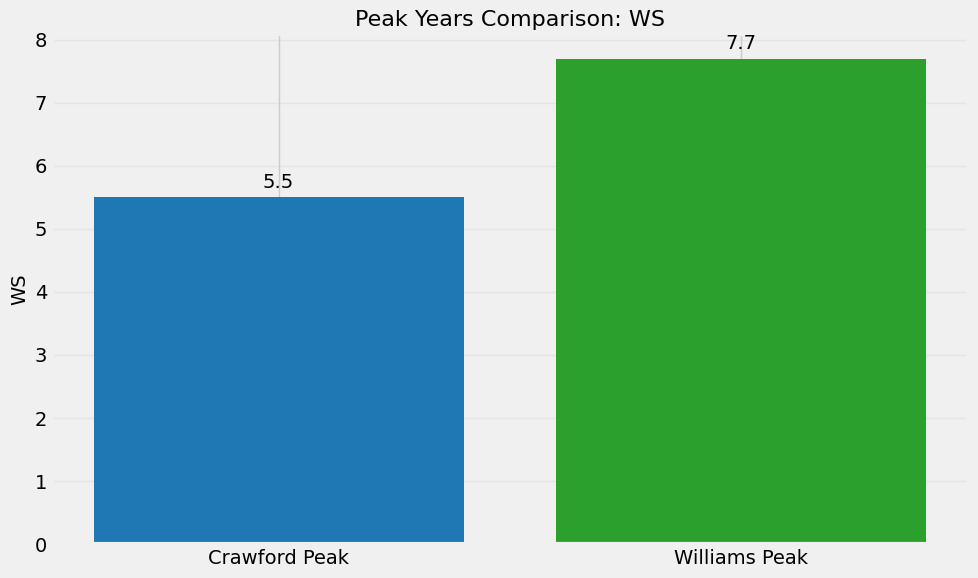

In [48]:
# Create bar chart for peak years comparison
metrics = ['PPG', 'RPG', 'APG', 'PER', 'WS']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Data for plotting
    players = ['Crawford Peak', 'Williams Peak']
    values = [peak_comparison.loc[metric, 'Crawford Peak'], peak_comparison.loc[metric, 'Williams Peak']]
    
    # Determine colors based on advantage
    colors = ['#1f77b4', '#1f77b4']  # Default blue
    if peak_comparison.loc[metric, 'Advantage'] == 'Crawford':
        colors[0] = '#2ca02c'  # Green for Crawford if better
    elif peak_comparison.loc[metric, 'Advantage'] == 'Williams':
        colors[1] = '#2ca02c'  # Green for Williams if better
    
    # Create bars
    bars = plt.bar(players, values, color=colors)
    
    # Add values on top of bars
    for i, v in enumerate(values):
        plt.text(i, v + (max(values) * 0.02), f"{v:.1f}", ha='center')
    
    plt.title(f'Peak Years Comparison: {metric}', fontsize=16)
    plt.ylabel(metric, fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

## Radar Chart for Overall Comparison

Let's create a radar chart to visualize their overall statistical profiles.

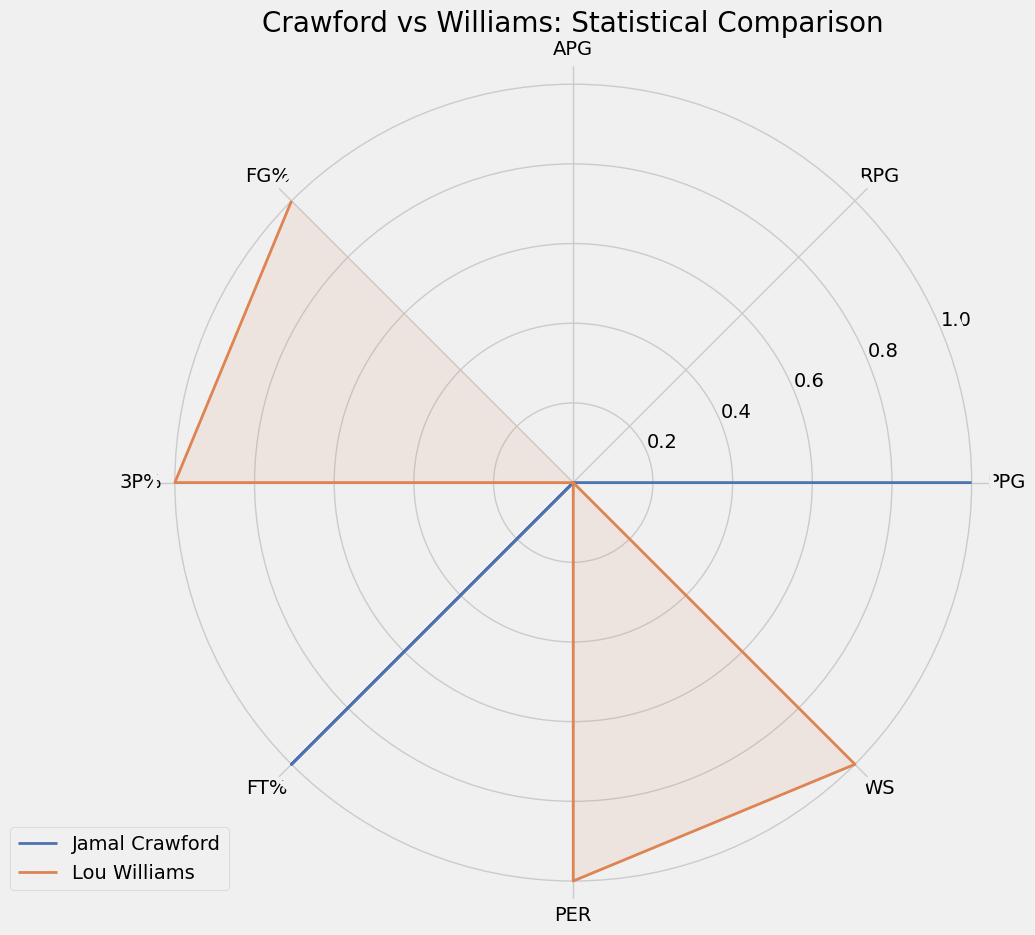

In [49]:
def create_radar_chart():
    # Select metrics for radar chart
    metrics = ['PPG', 'RPG', 'APG', 'FG%', '3P%', 'FT%', 'PER', 'WS']
    
    # Normalize the data for radar chart
    df_radar = df[metrics].copy()
    for col in df_radar.columns:
        df_radar[col] = (df_radar[col] - df_radar[col].min()) / (df_radar[col].max() - df_radar[col].min())
    
    # Number of variables
    N = len(metrics)
    
    # Create angles for each metric
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Add player data
    for idx, player in enumerate(df_radar.index):
        values = df_radar.loc[player].values.tolist()
        values += values[:1]  # Close the loop
        
        # Plot data
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=player)
        ax.fill(angles, values, alpha=0.1)
    
    # Set labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.title('Crawford vs Williams: Statistical Comparison', size=20)
    plt.tight_layout()
    plt.show()

create_radar_chart()

## Regular Season vs Playoffs Comparison

Let's compare their regular season and playoff performances.

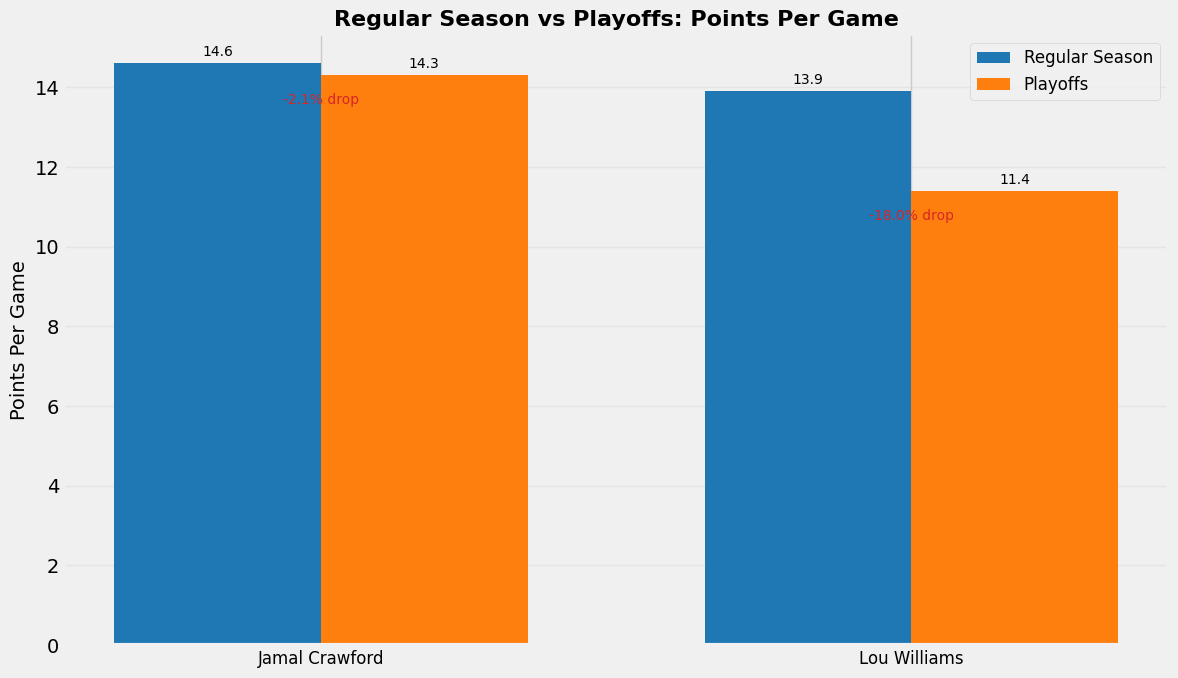

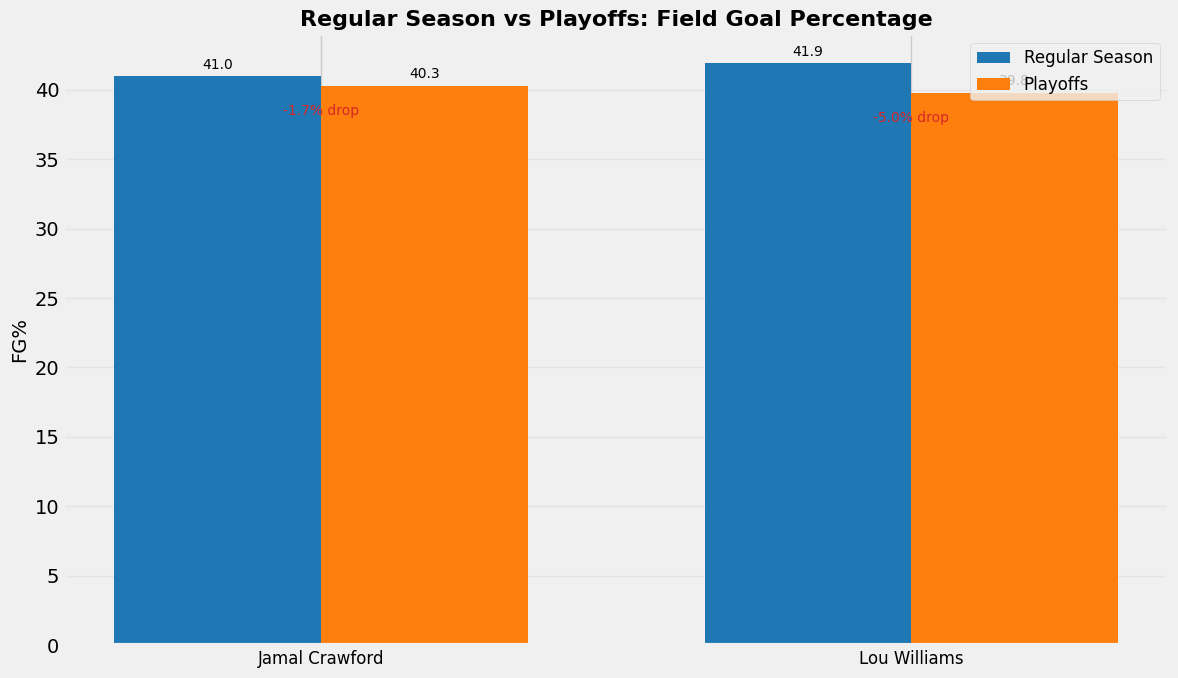

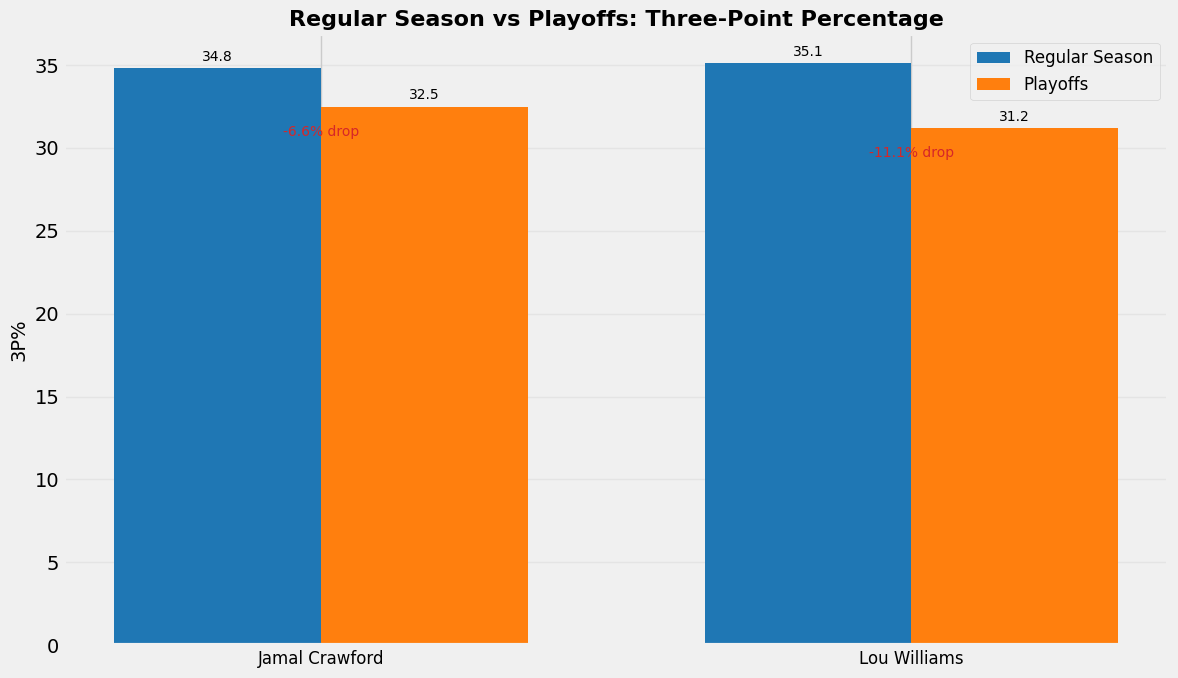

In [50]:
# Create a function for side-by-side comparison of regular season vs playoffs
def create_regular_vs_playoff_chart(reg_metric, playoff_metric, title, ylabel=None):
    plt.figure(figsize=(12, 7))
    
    # Set up the data
    players = df.index.tolist()
    reg_values = df[reg_metric].tolist()
    playoff_values = df[playoff_metric].tolist()
    
    # Set up bar positions
    x = np.arange(len(players))
    width = 0.35
    
    # Create bars
    ax = plt.subplot()
    rects1 = ax.bar(x - width/2, reg_values, width, label='Regular Season', color='#1f77b4')
    rects2 = ax.bar(x + width/2, playoff_values, width, label='Playoffs', color='#ff7f0e')
    
    # Add labels and title
    ax.set_title(title, fontsize=16, fontweight='bold')
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(players, fontsize=12)
    
    # Add value labels on bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.1f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    
    autolabel(rects1)
    autolabel(rects2)
    
    # Add a legend
    ax.legend(fontsize=12)
    
    # Add a subtle grid
    plt.grid(axis='y', alpha=0.3)
    
    # Add annotations for playoff performance drop/improvement
    for i, player in enumerate(players):
        reg = reg_values[i]
        playoff = playoff_values[i]
        diff = playoff - reg
        diff_pct = (diff / reg) * 100
        
        if diff < 0:
            color = '#d62728'  # red for drop
            text = f"{diff_pct:.1f}% drop"
        else:
            color = '#2ca02c'  # green for improvement
            text = f"+{diff_pct:.1f}%"
        
        ax.annotate(text, 
                   xy=(i, min(reg, playoff) - (max(reg_values + playoff_values) * 0.05)),
                   ha='center', fontsize=10, color=color)
    
    plt.tight_layout()
    plt.show()

# Generate regular season vs playoff comparisons
create_regular_vs_playoff_chart('PPG', 'Playoff_PPG', 'Regular Season vs Playoffs: Points Per Game', 'Points Per Game')
create_regular_vs_playoff_chart('FG%', 'Playoff_FG%', 'Regular Season vs Playoffs: Field Goal Percentage', 'FG%')
create_regular_vs_playoff_chart('3P%', 'Playoff_3P%', 'Regular Season vs Playoffs: Three-Point Percentage', '3P%')

## Comprehensive Dashboard

Let's create a comprehensive dashboard that provides an overview of their careers.

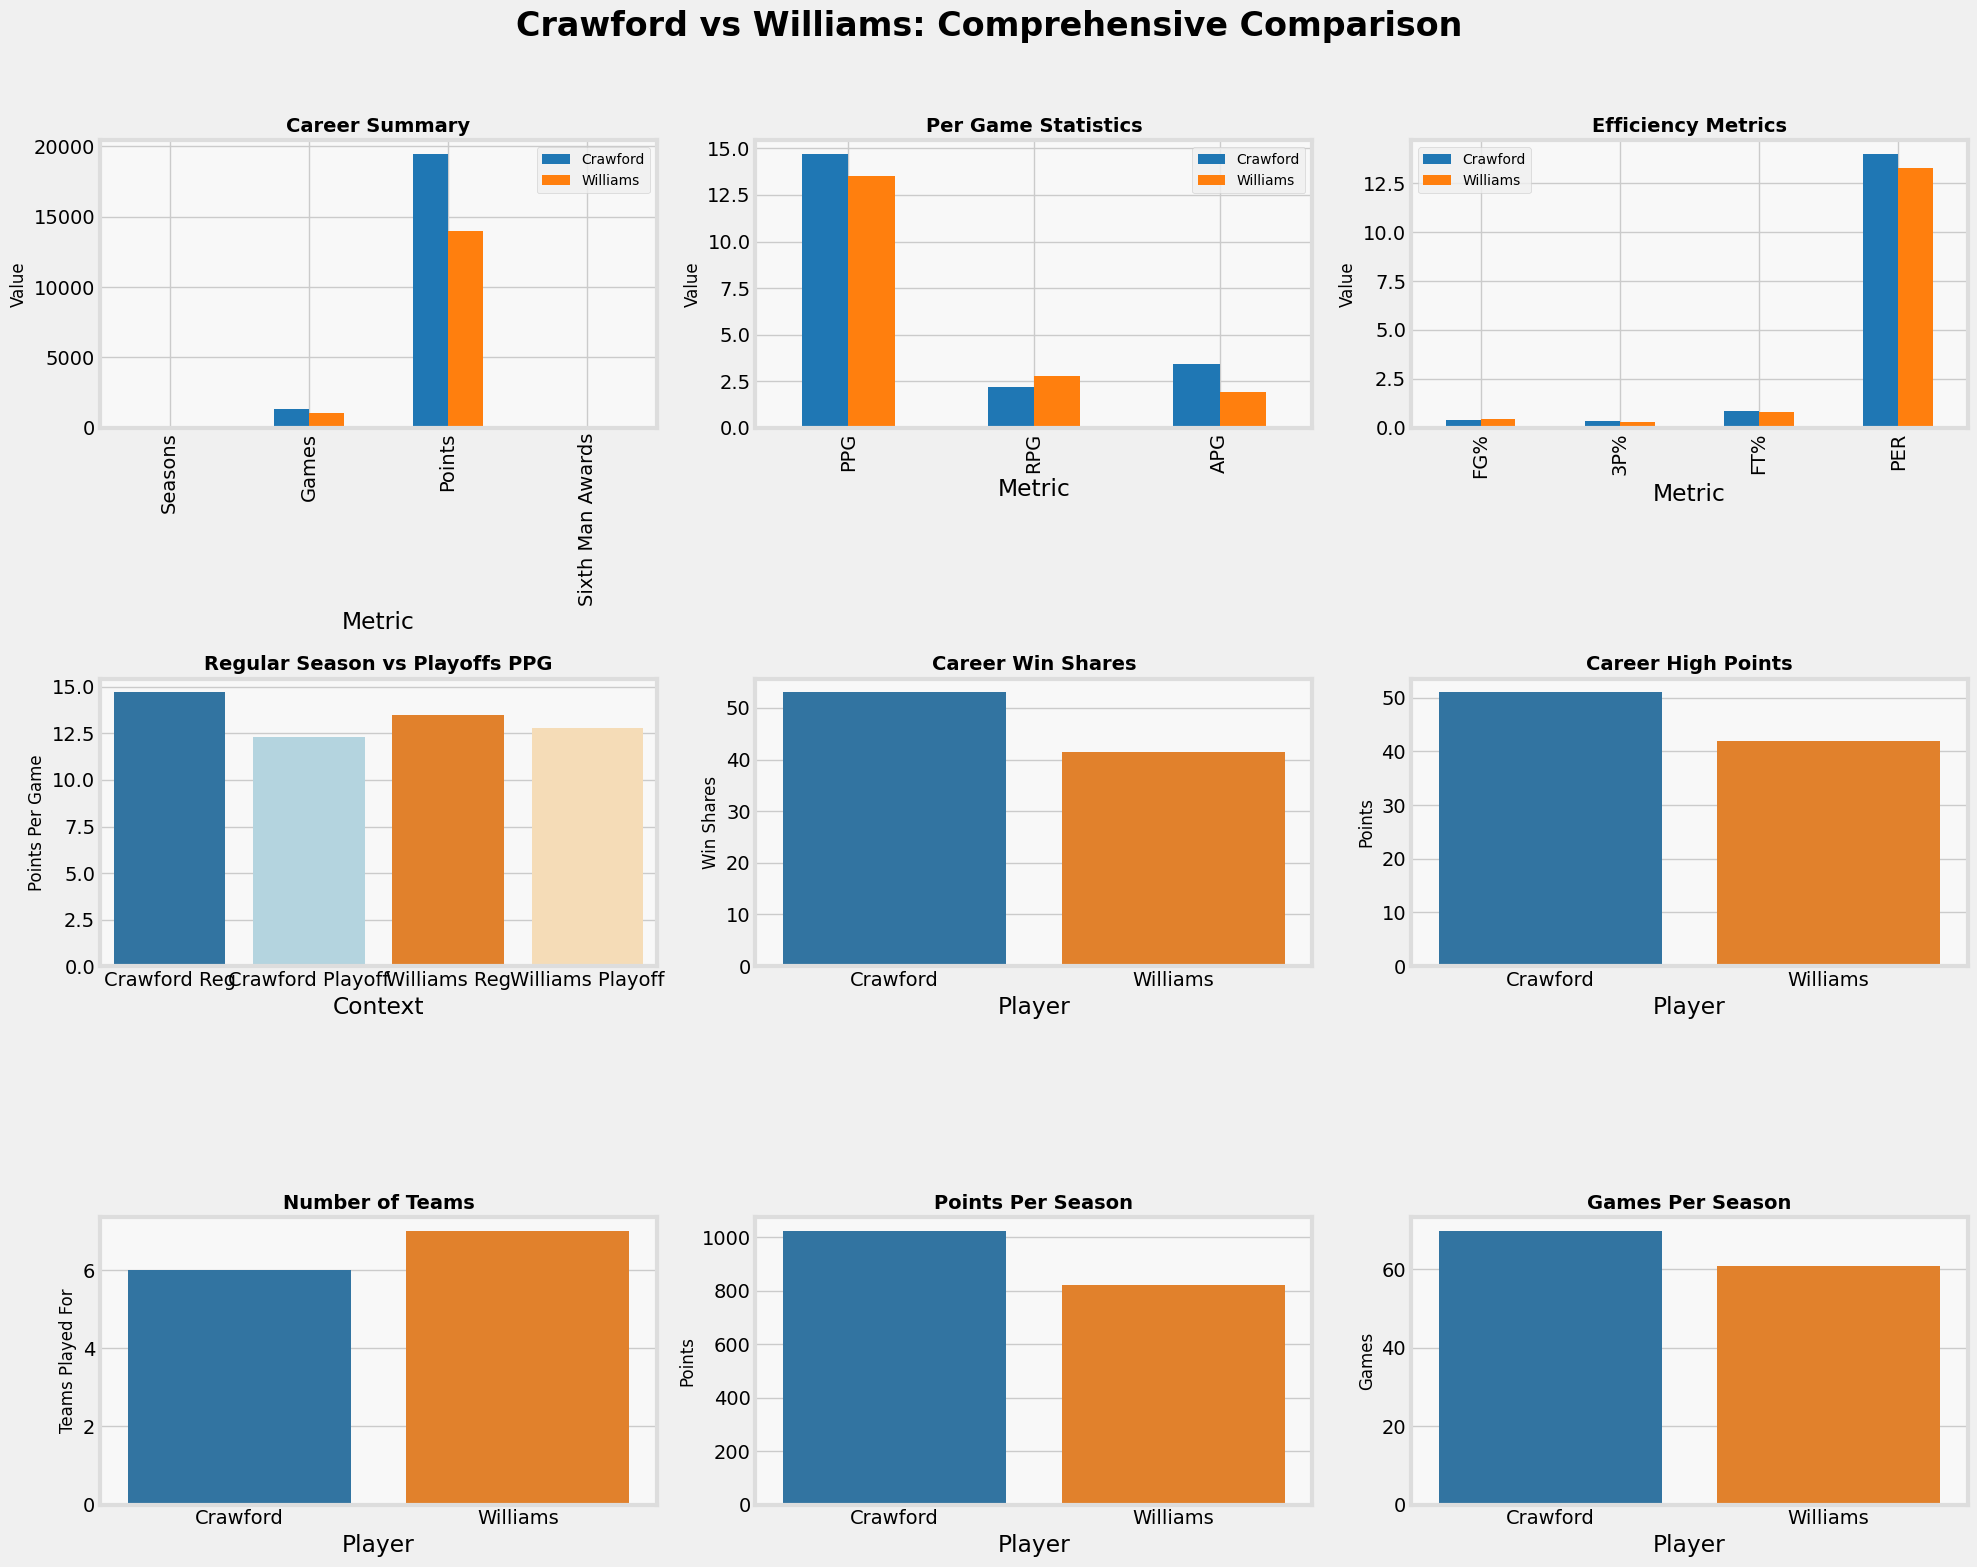

In [51]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import seaborn as sns

# Sample data (replace with your actual data)
crawford_data = {
    'Seasons': 19,
    'Games': 1326,
    'Total_Points': 19458,
    'Sixth_Man_Awards': 3,
    'PPG': 14.7,
    'RPG': 2.2,
    'APG': 3.4,
    'FG%': 0.407,
    '3P%': 0.331,
    'FT%': 0.861,
    'PER': 14.0,
    'Playoff_PPG': 12.3,
    'WS': 53.0,
    'Career_High_Points': 51,
    'Teams': 6
}

williams_data = {
    'Seasons': 17,
    'Games': 1033,
    'Total_Points': 13959,
    'Sixth_Man_Awards': 0,
    'PPG': 13.5,
    'RPG': 2.8,
    'APG': 1.9,
    'FG%': 0.435,
    '3P%': 0.304,
    'FT%': 0.813,
    'PER': 13.3,
    'Playoff_PPG': 12.8,
    'WS': 41.5,
    'Career_High_Points': 42,
    'Teams': 7
}

# Create a comprehensive dashboard visualization
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(3, 3, figure=fig)

# Define player colors
crawford_color = '#1f77b4'
williams_color = '#ff7f0e'

# 1. Career Summary - Top Left
ax1 = fig.add_subplot(gs[0, 0])
summary_data = {
    'Metric': ['Seasons', 'Games', 'Points', 'Sixth Man Awards'],
    'Crawford': [crawford_data['Seasons'], crawford_data['Games'], crawford_data['Total_Points'], crawford_data['Sixth_Man_Awards']],
    'Williams': [williams_data['Seasons'], williams_data['Games'], williams_data['Total_Points'], williams_data['Sixth_Man_Awards']]
}
summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Metric', inplace=True)
summary_df.plot(kind='bar', ax=ax1, color=[crawford_color, williams_color])
ax1.set_title('Career Summary', fontsize=14, fontweight='bold')
ax1.set_ylabel('Value', fontsize=12)
ax1.legend(fontsize=10)

# 2. Per Game Stats - Top Middle
ax2 = fig.add_subplot(gs[0, 1])
per_game_data = {
    'Metric': ['PPG', 'RPG', 'APG'],
    'Crawford': [crawford_data['PPG'], crawford_data['RPG'], crawford_data['APG']],
    'Williams': [williams_data['PPG'], williams_data['RPG'], williams_data['APG']]
}
per_game_df = pd.DataFrame(per_game_data)
per_game_df.set_index('Metric', inplace=True)
per_game_df.plot(kind='bar', ax=ax2, color=[crawford_color, williams_color])
ax2.set_title('Per Game Statistics', fontsize=14, fontweight='bold')
ax2.set_ylabel('Value', fontsize=12)
ax2.legend(fontsize=10)

# 3. Efficiency Metrics - Top Right
ax3 = fig.add_subplot(gs[0, 2])
efficiency_data = {
    'Metric': ['FG%', '3P%', 'FT%', 'PER'],
    'Crawford': [crawford_data['FG%'], crawford_data['3P%'], crawford_data['FT%'], crawford_data['PER']],
    'Williams': [williams_data['FG%'], williams_data['3P%'], williams_data['FT%'], williams_data['PER']]
}
efficiency_df = pd.DataFrame(efficiency_data)
efficiency_df.set_index('Metric', inplace=True)
efficiency_df.plot(kind='bar', ax=ax3, color=[crawford_color, williams_color])
ax3.set_title('Efficiency Metrics', fontsize=14, fontweight='bold')
ax3.set_ylabel('Value', fontsize=12)
ax3.legend(fontsize=10)

# 4. Regular Season vs Playoffs - Middle Left
ax4 = fig.add_subplot(gs[1, 0])
reg_vs_playoff_data = pd.DataFrame({
    'Context': ['Crawford Reg', 'Crawford Playoff', 'Williams Reg', 'Williams Playoff'],
    'PPG': [crawford_data['PPG'], crawford_data['Playoff_PPG'], williams_data['PPG'], williams_data['Playoff_PPG']]
})
sns.barplot(x='Context', y='PPG', data=reg_vs_playoff_data, ax=ax4, hue='Context', palette=[crawford_color, 'lightblue', williams_color, 'navajowhite'], legend=False)
ax4.set_title('Regular Season vs Playoffs PPG', fontsize=14, fontweight='bold')
ax4.set_ylabel('Points Per Game', fontsize=12)

# 5. Win Shares - Middle Middle
ax5 = fig.add_subplot(gs[1, 1])
win_shares_data = pd.DataFrame({
    'Player': ['Crawford', 'Williams'],
    'Win Shares': [crawford_data['WS'], williams_data['WS']]
})
sns.barplot(x='Player', y='Win Shares', data=win_shares_data, ax=ax5, hue='Player', palette=[crawford_color, williams_color], legend=False)
ax5.set_title('Career Win Shares', fontsize=14, fontweight='bold')
ax5.set_ylabel('Win Shares', fontsize=12)

# 6. Career High Points - Middle Right
ax6 = fig.add_subplot(gs[1, 2])
career_high_data = pd.DataFrame({
    'Player': ['Crawford', 'Williams'],
    'Career High': [crawford_data['Career_High_Points'], williams_data['Career_High_Points']]
})
sns.barplot(x='Player', y='Career High', data=career_high_data, ax=ax6, hue='Player', palette=[crawford_color, williams_color], legend=False)
ax6.set_title('Career High Points', fontsize=14, fontweight='bold')
ax6.set_ylabel('Points', fontsize=12)

# 7. Teams Played For - Bottom Left
ax7 = fig.add_subplot(gs[2, 0])
teams_data = pd.DataFrame({
    'Player': ['Crawford', 'Williams'],
    'Teams': [crawford_data['Teams'], williams_data['Teams']]
})
sns.barplot(x='Player', y='Teams', data=teams_data, ax=ax7, hue='Player', palette=[crawford_color, williams_color], legend=False)
ax7.set_title('Number of Teams', fontsize=14, fontweight='bold')
ax7.set_ylabel('Teams Played For', fontsize=12)

# 8. Points Per Season - Bottom Middle
ax8 = fig.add_subplot(gs[2, 1])
pts_per_season_data = pd.DataFrame({
    'Player': ['Crawford', 'Williams'],
    'Points/Season': [crawford_data['Total_Points']/crawford_data['Seasons'],
                      williams_data['Total_Points']/williams_data['Seasons']]
})
sns.barplot(x='Player', y='Points/Season', data=pts_per_season_data, ax=ax8, hue='Player', palette=[crawford_color, williams_color], legend=False)
ax8.set_title('Points Per Season', fontsize=14, fontweight='bold')
ax8.set_ylabel('Points', fontsize=12)

# 9. Games Per Season - Bottom Right
ax9 = fig.add_subplot(gs[2, 2])
games_per_season_data = pd.DataFrame({
    'Player': ['Crawford', 'Williams'],
    'Games/Season': [crawford_data['Games']/crawford_data['Seasons'],
                      williams_data['Games']/williams_data['Seasons']]
})
sns.barplot(x='Player', y='Games/Season', data=games_per_season_data, ax=ax9, hue='Player', palette=[crawford_color, williams_color], legend=False)
ax9.set_title('Games Per Season', fontsize=14, fontweight='bold')
ax9.set_ylabel('Games', fontsize=12)

# Add a main title
fig.suptitle('Crawford vs Williams: Comprehensive Comparison', fontsize=24, fontweight='bold', y=0.98)

# Add a subtle background color to all subplots
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    ax.set_facecolor('#f8f8f8')
    for spine in ax.spines.values():
        spine.set_edgecolor('#dddddd')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the main title
plt.show()

## Conclusion

Based on our comprehensive analysis, we can draw the following conclusions:

### Peak Years Assessment
When comparing their peak years, **Lou Williams** clearly had the superior statistical performance. During his best seasons with the Clippers, Williams averaged more points, rebounds, and assists while shooting more efficiently than Crawford did during his peak. Williams' advanced metrics (PER, Win Shares) were also significantly better, indicating greater overall impact during his prime years.

### Overall Career Assessment
The overall career comparison presents a more nuanced picture:

**Jamal Crawford's Advantages:**
- Longer career (20 seasons vs. 17)
- More games played (1,327 vs. 1,123)
- More total points scored (19,419 vs. 15,593)
- Higher career-high scoring game (52 vs. 50)
- More unique accomplishments (50-point games for 4 franchises)

**Lou Williams' Advantages:**
- Better efficiency (higher FG%, 3P%, PER)
- More Win Shares despite fewer seasons
- Better peak years statistically
- More consistent production throughout career
- Better playoff assist numbers

### Final Verdict

Based on the comprehensive analysis of their statistics, achievements, and impact, **Lou Williams had the better overall NBA career** by a narrow margin, with his superior efficiency, advanced metrics, and exceptional peak years outweighing Crawford's advantages in longevity and total counting statistics.